In [42]:
import json

import seaborn as sns
import pandas as pd

sns.set_theme(style="whitegrid", palette="colorblind")


In [43]:
data_file = '../data/codes/all-data.one-hot.xlsx'

df = pd.read_excel(data_file)
df.head(2)

,Conference,Year,Reference string,Type,Award,IIR study paper?,Notes,Reference author_string,Reference title_string,DOI,...,user_issue_trust,user_issue_memory,user_issue_information_behavior,user_issue_distraction,user_issue_user_behavior,user_issue_serendipity,user_group_disabilities,user_group_children,user_group_older_people,user_group_LGBTQ+
0,CHIIR,2016,"Hugo C. Huurdeman, Max L. Wilson, and Jaap Kam...",NaN,NaN,NaN,NaN,"Hugo C. Huurdeman, Max L. Wilson, and Jaap Kamps.",Active and Passive Utility of Search Interface...,10.1145/2854946.2854957,...,0,0,0,0,0,0,0,0,0,0
1,CHIIR,2016,"Tuan A. Tran, Sven Schwarz, Claudia NiederÃ©e,...",NaN,NaN,NaN,NaN,"Tuan A. Tran, Sven Schwarz, Claudia NiederÃ©e,...",The Forgotten Needle in My Collections: Task-A...,10.1145/2854946.2854971,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df.columns.to_list()

['Conference',
 'Year',
 'Reference string',
 'Type',
 'Award',
 'IIR study paper?',
 'Notes',
 'Reference author_string',
 'Reference title_string',
 'DOI',
 'website_title',
 'website_paper_type',
 'website_year',
 'annotator',
 'paper_id',
 'nd',
 '2022.0',
 '2021.0',
 '2020.0',
 '2019.0',
 '2018.0',
 '2017.0',
 '2016.0',
 '2015.0',
 '2011.0',
 '2010.0',
 '2009.0',
 'Grand Total',
 'total_2009-2022',
 '7-yr',
 '6-yr',
 '5-yr',
 '4-yr',
 '3-yr',
 '2-yr',
 '1-yr',
 'cits/year_total',
 'cits/year_2009-2022',
 'design_type_experimental',
 'design_type_resource_paper',
 'design_type_theoretical',
 'data_re-use',
 'data_share',
 'design_re-use',
 'design_share',
 'infrastructure_re-use',
 'infrastructure_share',
 'design_method_questionnaire',
 'design_method_content_analysis',
 'design_method_interview',
 'design_method_think-aloud',
 'design_method_log_analysis',
 'design_method_user_study',
 'design_method_data_analysis',
 'design_method_controlled_experiment',
 'design_method_data_don

In [45]:
design_type_cols = [col for col in df.columns if col.startswith('design_type_')]
design_method_cols = [col for col in df.columns if col.startswith('design_method_')]
design_type_cols
design_method_cols

['design_method_questionnaire',
 'design_method_content_analysis',
 'design_method_interview',
 'design_method_think-aloud',
 'design_method_log_analysis',
 'design_method_user_study',
 'design_method_data_analysis',
 'design_method_controlled_experiment',
 'design_method_data_donation',
 'design_method_evaluation',
 'design_method_crawling',
 'design_method_observation',
 'design_method_literature_review',
 'design_method_eye-tracking',
 'design_method_crowdsourcing',
 'design_method_screen_recording',
 'design_method_simulation',
 'design_method_factor_analysis',
 'design_method_diary_study',
 'design_method_cluster_analysis',
 'design_method_woz',
 'design_method_data_visualization',
 'design_method_network_analysis',
 'design_method_cognitive_work_analysis',
 'design_method_ethnography',
 'design_method_CI',
 'design_method_task_analysis']

In [46]:
main_prefixes = [
    'application',
    'document',
    'research',
    'task',
    'user'
]

main_cat_map = {col: col.split('_')[0] for col in df.columns if col.split('_')[0] in main_prefixes}
main_cat_map

main_spec_cats = {main_prefix: [] for main_prefix in main_prefixes}
for spec_cat in main_cat_map:
    main_spec_cats[main_cat_map[spec_cat]].append(spec_cat)

for main_cat in main_prefixes:
    df[main_cat] = df[main_spec_cats[main_cat]].sum(axis=1)
    df[main_cat] = df[main_cat].apply(lambda x: 1 if x > 1 else x)


In [47]:
df

,Conference,Year,Reference string,Type,Award,IIR study paper?,Notes,Reference author_string,Reference title_string,DOI,...,user_issue_serendipity,user_group_disabilities,user_group_children,user_group_older_people,user_group_LGBTQ+,application,document,research,task,user
0,CHIIR,2016,"Hugo C. Huurdeman, Max L. Wilson, and Jaap Kam...",NaN,NaN,NaN,NaN,"Hugo C. Huurdeman, Max L. Wilson, and Jaap Kamps.",Active and Passive Utility of Search Interface...,10.1145/2854946.2854957,...,0,0,0,0,0,1,1,0,0,0
1,CHIIR,2016,"Tuan A. Tran, Sven Schwarz, Claudia NiederÃ©e,...",NaN,NaN,NaN,NaN,"Tuan A. Tran, Sven Schwarz, Claudia NiederÃ©e,...",The Forgotten Needle in My Collections: Task-A...,10.1145/2854946.2854971,...,0,0,0,0,0,0,0,0,0,0
2,CHIIR,2016,Charlie Abela and Chris Staff. 2016. Behaviour...,NaN,NaN,NaN,NaN,Charlie Abela and Chris Staff.,Behaviour Mining for Automatic Task-Keeping an...,10.1145/2854946.2854966,...,0,0,0,0,0,0,1,0,1,0
3,CHIIR,2016,"Shuguang Han, Daqing He, Zhen Yue, and Jiepu J...",NaN,NaN,NaN,NaN,"Shuguang Han, Daqing He, Zhen Yue, and Jiepu J...",Contextual Support for Collaborative Informati...,10.1145/2854946.2854963,...,0,0,0,0,0,0,0,0,1,0
4,CHIIR,2016,Scott Bateman and Carl Gutwin. 2016. (The Lack...,NaN,NaN,NaN,NaN,Scott Bateman and Carl Gutwin.,(The Lack of) Privacy Concerns with Sharing We...,10.1145/2854946.2854977,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,CHIIR,2022,"Markus Schedl, Stefan Brandl, Oleg Lesota, Emi...",Demo,NaN,NaN,NaN,"Markus Schedl, Stefan Brandl, Oleg Lesota, Emi...",LFM-2b: A Dataset of Enriched Music Listening ...,10.1145/3498366.3505791,...,0,0,0,0,0,0,1,0,0,0
351,CHIIR,2022,"Jiayu Li, Hantian Zhang, Zhiyu He, Rongwu Xu, ...",Demo,NaN,NaN,NaN,"Jiayu Li, Hantian Zhang, Zhiyu He, Rongwu Xu, ...",LifeRec: A Mobile App for Lifelog Recording an...,10.1145/3498366.3505837,...,0,0,0,0,0,1,1,0,0,0
352,CHIIR,2022,"Christian Otto, Markus Rokicki, Georg Pardi, W...",Demo,NaN,NaN,NaN,"Christian Otto, Markus Rokicki, Georg Pardi, W...",SaL-Lightning Dataset: Search and Eye Gaze Beh...,10.1145/3498366.3505835,...,0,0,0,0,0,0,0,0,1,0
353,CHIIR,2022,"Denis Kotkov, Alan Medlar, Alexandr Maslov, Um...",Demo,NaN,NaN,NaN,"Denis Kotkov, Alan Medlar, Alexandr Maslov, Um...",The Tag Genome Dataset for Books.,10.1145/3498366.3505833,...,0,0,0,0,0,0,1,0,0,0


In [48]:
cite_cols = ['1-yr', '2-yr', '3-yr']
cite_df = df[['DOI', 'Year'] + cite_cols]#.fillna(0.0)
cite_df.head(2)

,DOI,Year,1-yr,2-yr,3-yr
0,10.1145/2854946.2854957,2016,0,6.0,9.0
1,10.1145/2854946.2854971,2016,2,4.0,7.0


In [49]:
cite_df['3-yr'].value_counts()

3.0     32
2.0     27
4.0     26
0.0     24
1.0     18
7.0     18
5.0     18
6.0     16
8.0     12
9.0     11
11.0    11
13.0     9
10.0     9
15.0     8
12.0     5
22.0     3
17.0     3
14.0     3
19.0     3
27.0     2
18.0     2
16.0     2
20.0     2
54.0     1
74.0     1
24.0     1
31.0     1
40.0     1
39.0     1
23.0     1
64.0     1
51.0     1
21.0     1
Name: 3-yr, dtype: int64

In [50]:
cite_df.describe()

,Year,1-yr,2-yr,3-yr
count,355.000000,355.000000,312.000000,274.000000
mean,2018.861972,1.222535,4.451923,7.613139
std,1.937029,1.733208,5.069700,9.161352
min,2016.000000,0.000000,0.000000,0.000000
25%,2017.000000,0.000000,1.000000,2.250000
50%,2019.000000,1.000000,3.000000,5.000000
75%,2020.000000,2.000000,6.000000,10.000000
max,2022.000000,14.000000,31.000000,74.000000


The median number of citations after 1 year is 1, after 2 years it's 2 and after 3 years it's 3.



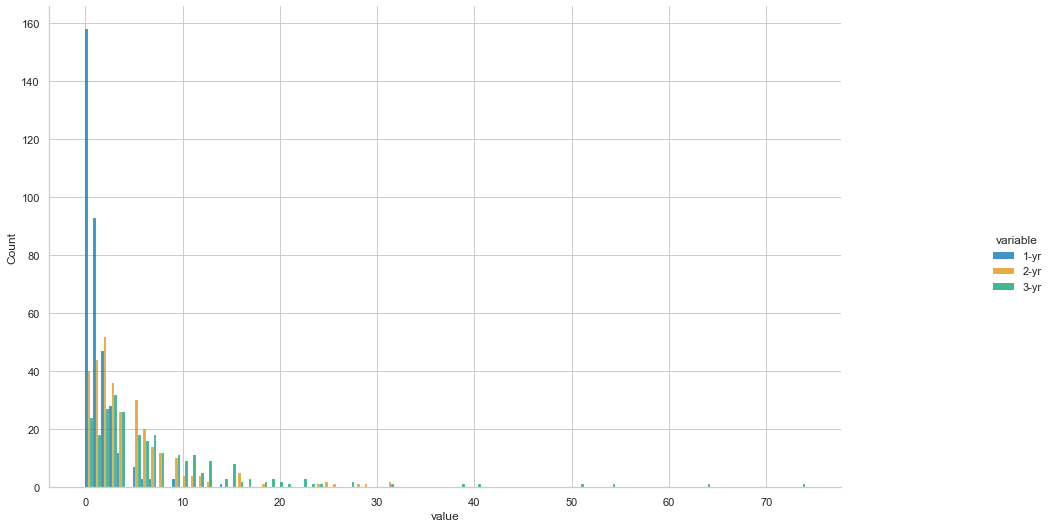

In [51]:
grid = sns.displot(data=cite_df.melt(id_vars=['Year'], value_vars=cite_cols), x='value', hue='variable', multiple="dodge");

grid.fig.set_size_inches(16,8)

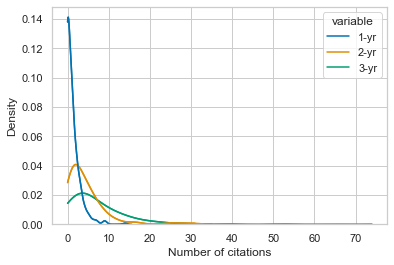

In [52]:
sns.kdeplot(data=cite_df.melt(id_vars=['Year'], value_vars=cite_cols), x='value', hue='variable', cut=0);

ax = sns.kdeplot(data=cite_df.melt(id_vars=['Year'], value_vars=cite_cols), x='value', hue='variable', clip=(0, 35));

ax.set_xlabel('Number of citations');


In [53]:
cite_df.melt(id_vars=['Year'], value_vars=cite_cols)

,Year,variable,value
0,2016,1-yr,0.0
1,2016,1-yr,2.0
2,2016,1-yr,0.0
3,2016,1-yr,0.0
4,2016,1-yr,0.0
...,...,...,...
1060,2022,3-yr,NaN
1061,2022,3-yr,NaN
1062,2022,3-yr,NaN
1063,2022,3-yr,NaN


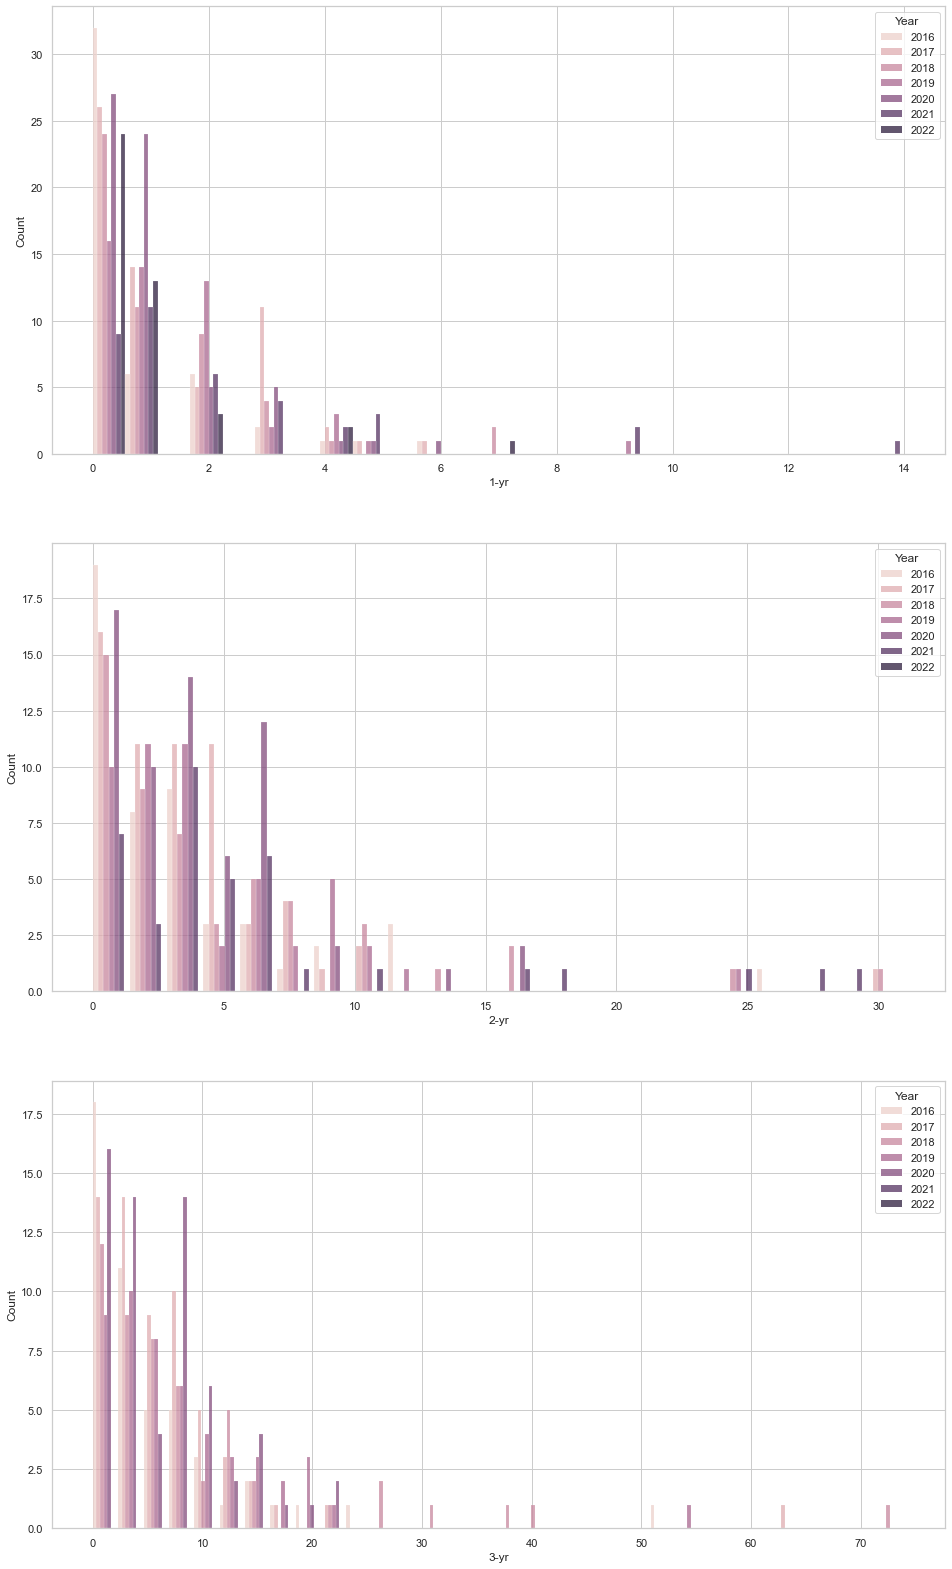

In [54]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3,1)
#sns.displot(data=cite_df, x='1-yr');

sns.histplot(data=cite_df, x='1-yr', hue='Year', ax=ax[0], multiple='dodge');
sns.histplot(data=cite_df, x='2-yr', hue='Year', ax=ax[1], multiple='dodge');
sns.histplot(data=cite_df, x='3-yr', hue='Year', ax=ax[2], multiple='dodge');

fig.set_size_inches(16,28)


/opt/homebrew/lib/python3.10/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.10/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


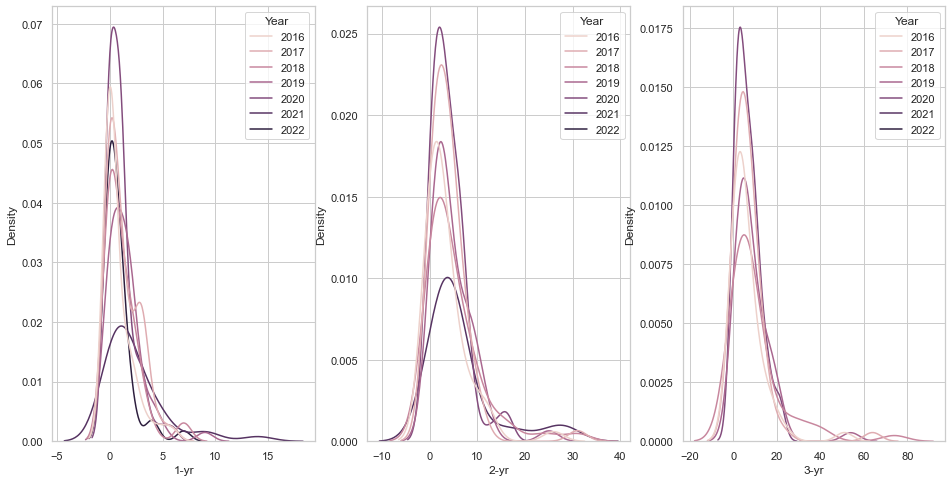

In [55]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,3)
#sns.displot(data=cite_df, x='1-yr');

grid = sns.kdeplot(data=cite_df, x='1-yr', hue='Year', ax=ax[0]);
grid = sns.kdeplot(data=cite_df, x='2-yr', hue='Year', ax=ax[1]);
grid = sns.kdeplot(data=cite_df, x='3-yr', hue='Year', ax=ax[2]);

grid.figure.set_size_inches(16,8)


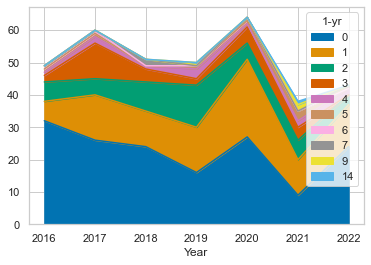

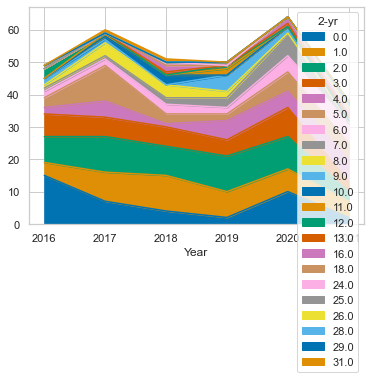

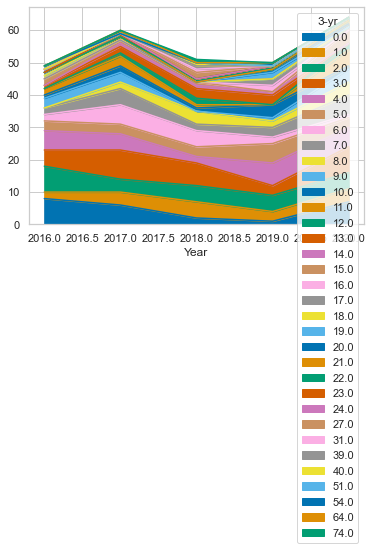

In [56]:

cite_df.groupby('Year')['1-yr'].value_counts().unstack().fillna(0.0).plot(kind='area');
cite_df.groupby('Year')['2-yr'].value_counts().unstack().fillna(0.0).plot(kind='area');
cite_df.groupby('Year')['3-yr'].value_counts().unstack().fillna(0.0).plot(kind='area');


# Citations and Paper Focus

In [57]:
main_cite = df[['DOI', 'Year'] + main_prefixes + cite_cols]
main_cite.head(2)

,DOI,Year,application,document,research,task,user,1-yr,2-yr,3-yr
0,10.1145/2854946.2854957,2016,1,1,0,0,0,0,6.0,9.0
1,10.1145/2854946.2854971,2016,0,0,0,0,0,2,4.0,7.0


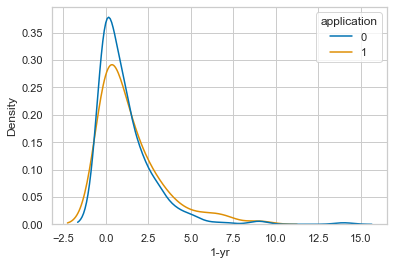

In [58]:
sns.kdeplot(data=main_cite, x='1-yr', hue='application', common_norm=False);

In [59]:
main_cite_dict = {}
for main_cat in main_prefixes:
    main_cite_dict[main_cat] = main_cite[main_cite.application == 1]
    main_cite_dict[main_cat]['focus'] = main_cat
    

/var/folders/xk/pp9n20396sqccydf42gn2rmr0000gn/T/ipykernel_99185/3033903159.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cite_dict[main_cat]['focus'] = main_cat
/var/folders/xk/pp9n20396sqccydf42gn2rmr0000gn/T/ipykernel_99185/3033903159.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cite_dict[main_cat]['focus'] = main_cat
/var/folders/xk/pp9n20396sqccydf42gn2rmr0000gn/T/ipykernel_99185/3033903159.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

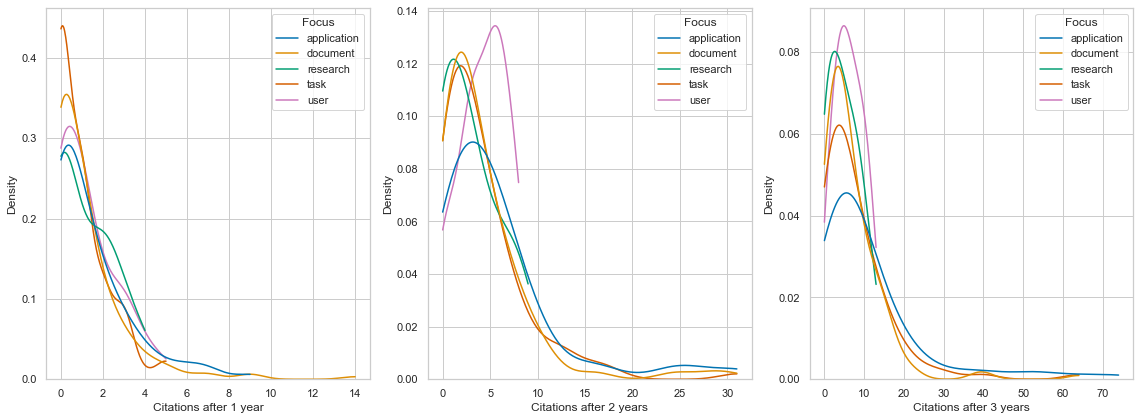

In [60]:
temp_df = main_cite.melt(id_vars=['Year'] + cite_cols, value_vars=main_prefixes)
temp_df = temp_df.rename(columns={'variable': 'Focus'})

fig, ax = plt.subplots(1,3)

sns.kdeplot(data=temp_df[temp_df.value == 1], x='1-yr', hue='Focus', common_norm=False, cut=0, ax=ax[0]);
sns.kdeplot(data=temp_df[temp_df.value == 1], x='2-yr', hue='Focus', common_norm=False, cut=0, ax=ax[1]);
sns.kdeplot(data=temp_df[temp_df.value == 1], x='3-yr', hue='Focus', common_norm=False, cut=0, ax=ax[2]);

ax[0].set_xlabel('Citations after 1 year');
ax[1].set_xlabel('Citations after 2 years');
ax[2].set_xlabel('Citations after 3 years');

fig.set_size_inches(16,6)
fig.tight_layout()

fig.savefig('../images/citation-focus.kde.png', dpi=300)

In [61]:
main_cite[main_cite['2-yr'] > 25]

,DOI,Year,application,document,research,task,user,1-yr,2-yr,3-yr
12,10.1145/2854946.2854961,2016,1,0,0,0,0,4,26.0,51.0
60,10.1145/3020165.3020183,2017,1,1,0,1,0,5,31.0,64.0
142,10.1145/3176349.3176868,2018,1,0,0,0,0,4,31.0,74.0
276,10.1145/3406522.3446023,2021,0,1,0,0,0,9,28.0,NaN
296,10.1145/3406522.3446033,2021,0,1,0,0,0,14,29.0,NaN


In [62]:
main_cite[main_cite['3-yr'] > 15][main_prefixes].sum()

application    15
document       10
research        0
task           11
user            0
dtype: int64

In [63]:
main_cite[main_cite['3-yr'] > 15].DOI.nunique()

27

In [64]:
main_cite[main_cite['3-yr'] > 15][main_prefixes].sum() / main_cite[main_cite['3-yr'] > 15].DOI.nunique()

application    0.555556
document       0.370370
research       0.000000
task           0.407407
user           0.000000
dtype: float64

There are 27 papers with more than 15 citations after 3 years. Of these, 15 (56%) are focused on an application aspect, 11 (41%) on a task aspect and 10 (37%) on a document aspect. Surprisingly, there are no papers focused on a research aspect or user aspects with more than 15 citations. 

# Citations and Design Type

In [65]:
type_cite = df[['DOI', 'Year'] + design_type_cols + cite_cols]
type_cite.head(2)

,DOI,Year,design_type_experimental,design_type_resource_paper,design_type_theoretical,1-yr,2-yr,3-yr
0,10.1145/2854946.2854957,2016,1,0,0,0,6.0,9.0
1,10.1145/2854946.2854971,2016,1,1,0,2,4.0,7.0


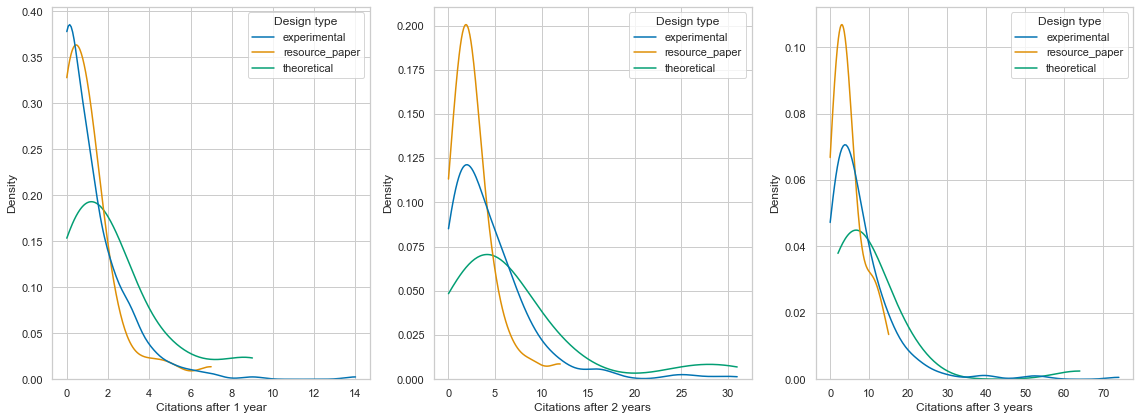

In [66]:
temp_df = type_cite.melt(id_vars=['Year'] + cite_cols, value_vars=design_type_cols)
temp_df['variable'] = temp_df.variable.apply(lambda x: x.replace('design_type_', ''))
temp_df = temp_df.rename(columns={'variable': 'Design type'})

fig, ax = plt.subplots(1,3)

sns.kdeplot(data=temp_df[temp_df.value == 1], x='1-yr', hue='Design type', common_norm=False, cut=0, ax=ax[0]);
sns.kdeplot(data=temp_df[temp_df.value == 1], x='2-yr', hue='Design type', common_norm=False, cut=0, ax=ax[1]);
sns.kdeplot(data=temp_df[temp_df.value == 1], x='3-yr', hue='Design type', common_norm=False, cut=0, ax=ax[2]);

ax[0].set_xlabel('Citations after 1 year');
ax[1].set_xlabel('Citations after 2 years');
ax[2].set_xlabel('Citations after 3 years');

fig.set_size_inches(16,6)
fig.tight_layout()

fig.savefig('../images/citation-type.kde.png', dpi=300)

# Citations and Design Method

In [73]:
len(design_method_cols)

27

In [67]:
s = df[design_method_cols].sum()
len(s[s >= 20])
method_cols = s[s >= 20].index
method_cols

Index(['design_method_questionnaire', 'design_method_content_analysis',
       'design_method_interview', 'design_method_log_analysis',
       'design_method_user_study', 'design_method_data_analysis',
       'design_method_controlled_experiment', 'design_method_evaluation',
       'design_method_eye-tracking', 'design_method_crowdsourcing'],
      dtype='object')

In [74]:
len(method_cols)

10

In [68]:
method_cite = df[['DOI', 'Year'] + list(method_cols) + cite_cols]
method_cite.head(2)

,DOI,Year,design_method_questionnaire,design_method_content_analysis,design_method_interview,design_method_log_analysis,design_method_user_study,design_method_data_analysis,design_method_controlled_experiment,design_method_evaluation,design_method_eye-tracking,design_method_crowdsourcing,1-yr,2-yr,3-yr
0,10.1145/2854946.2854957,2016,1,0,0,1,0,0,1,0,1,0,0,6.0,9.0
1,10.1145/2854946.2854971,2016,0,0,0,0,1,0,0,0,0,0,2,4.0,7.0


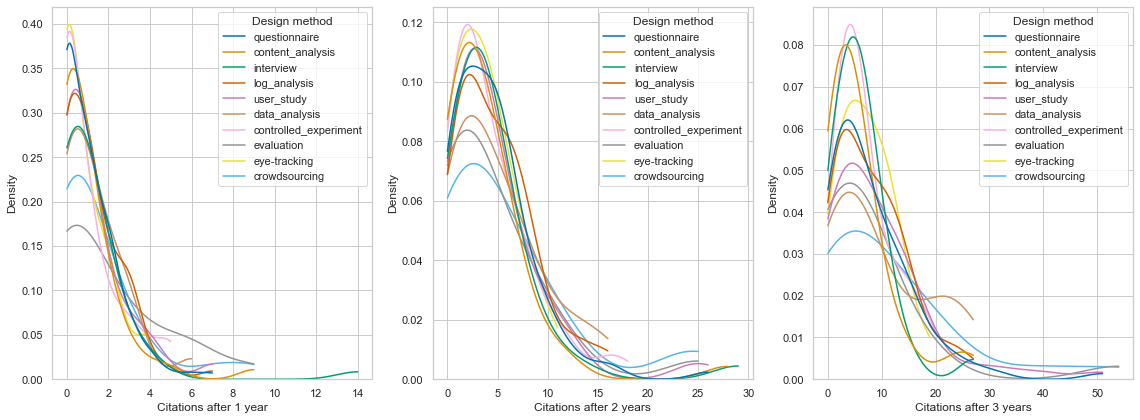

In [69]:
temp_df = method_cite.melt(id_vars=['Year'] + cite_cols, value_vars=method_cols)
temp_df['variable'] = temp_df.variable.apply(lambda x: x.replace('design_method_', ''))
temp_df = temp_df.rename(columns={'variable': 'Design method'})

fig, ax = plt.subplots(1,3)

sns.kdeplot(data=temp_df[temp_df.value == 1], x='1-yr', hue='Design method', common_norm=False, cut=0, ax=ax[0]);
sns.kdeplot(data=temp_df[temp_df.value == 1], x='2-yr', hue='Design method', common_norm=False, cut=0, ax=ax[1]);
sns.kdeplot(data=temp_df[temp_df.value == 1], x='3-yr', hue='Design method', common_norm=False, cut=0, ax=ax[2]);

ax[0].set_xlabel('Citations after 1 year');
ax[1].set_xlabel('Citations after 2 years');
ax[2].set_xlabel('Citations after 3 years');

fig.set_size_inches(16,6)
fig.tight_layout()

fig.savefig('../images/citation-method.kde.png', dpi=300)